# How Tensorflow's Dataset looks like?
__Hello, and welcome to this quick tutorial about tensorflow's dataset.__

## Objective ##
In this tutorial we'll visualize datasets from tensorflo library usually involved when coding ML programs.
I've made this tutorial cause i found is not so easy to understand what's going on inside input functions which 
usually are passed to .train() methods of varios tensorflow's estimators.

<div class="alert alert-block alert-info">
<b> Base Knowledge </b> While it's higly recommended you have some sort of tensorflow background, 
it's not mandatory and you could potentially learn what this tutorial is intended for.
</div>

## Introduction ##
When learning how to write basic machine learning code using tensorflow library, one of the very basic things one need to know is to write input functions, but what are input functions?. Basically, input functions retrieve data from a dataset (this includes features and targets), and pass it to a train.() mathod of a specific algorithm. Following I attach a screen capture  where you can see this function (from Google machine learning crash course):

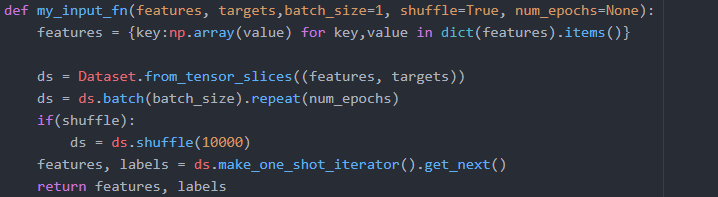

Altough there's quite extensive information on the tensorflow website about this, i did't fin how to properly visualize it (common Python print() function doesn't work for this).

This is exactly what we'll cvering on this tutorial, how we can take a look at this dataset, and how it works those "make_one_shot_iterator()" and ".get_next()" methods. Let's dive in.

## Simple example code ##
As a way of understanding this concept, making this process as simple as possible, we're going to use random floating-point data as our features and targets (labels). Suposse you're dealing with a binary classification problem (target = 0 or 1) with 10 different features. We can build two arrays for representing each one of the needed information:



In [289]:
import numpy as np

features = np.random.rand(10,10)
targets = np.random.randint(2, size=(10,1))

data = np.concatenate((targets,features),axis=1)
dataframe = pd.DataFrame(data, columns=["target","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"])
display(dataframe)
#print(dataframe)

,target,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1.00,0.43,0.58,0.62,0.00,0.36,0.93,0.50,1.00,0.38,0.90
1,0.00,0.58,0.80,0.69,0.02,0.36,0.66,0.33,0.04,0.51,0.87
2,1.00,0.53,0.11,0.24,0.02,0.98,0.24,0.37,0.49,0.28,0.18
3,0.00,0.64,0.65,0.59,0.23,0.30,0.96,0.79,0.07,0.12,0.03
4,0.00,0.18,0.64,0.60,0.87,0.79,0.30,0.70,0.43,0.61,0.69
5,0.00,0.31,0.03,0.76,0.49,0.48,0.66,0.42,0.75,0.01,0.42
6,0.00,0.06,0.14,0.23,0.55,0.25,0.57,0.99,0.20,0.94,0.87
7,1.00,0.59,0.79,0.11,0.33,0.66,0.44,0.86,0.17,0.78,0.78
8,0.00,0.03,0.79,0.42,0.51,0.64,0.99,0.52,0.02,0.98,0.61
9,0.00,0.62,0.25,0.16,0.23,0.04,0.10,0.56,0.56,0.11,0.56


### Create Dataset
This way we have created a dataframe that will be used for creating a Dataset. Note that the Dataframe can be printed out using both the built-in print function or the display function. The dataset is usally created using the .from_tensor_slices() function which slice the array accross the first dimension. Think of this as spliting the features and targets into the same number of rows, then when training our algorithm, this can take just one row from the features array and one row from the targets array for a training period (forward and backward pass).

In [293]:
dataset = Dataset.from_tensor_slices((features, targets))

### Visualize Dataset
At first we can think intuitively that print() function might wwork, or maybe display() function. Let's see what happens when we pass our dataset in these function.

In [294]:
print(dataset)
display(dataset)

<TensorSliceDataset shapes: ((10,), (1,)), types: (tf.float64, tf.int32)>


<TensorSliceDataset shapes: ((10,), (1,)), types: (tf.float64, tf.int32)>

#### Evaluate the graph
One easy way to see a value of a tensor whenever the graph is evaluated is by using the __Print__ operation. Next code snippet shows you how.

In [313]:
sess = tf.InteractiveSession()
feature_batch, target_batch = dataset.make_one_shot_iterator().get_next()

a = tf.Print(feature_batch,[feature_batch])
b = tf.Print(target_batch,[target_batch])

display(a.eval())
display(b.eval())

array([0.42529199, 0.57669983, 0.62391827, 0.00178283, 0.35818326,
       0.92566526, 0.50074759, 0.9956248 , 0.38459888, 0.90478893])

array([0])

This can give you a little bit of more insight about what is inside the dataset and how its data is retrieved during
training. Though this is great way of looking into your data, i personally prefer to take another approach, use a tensorflow session.

In [326]:
#First, build an iterator for our dataset
iterator = dataset.make_initializable_iterator()

#Declare a tf session
with tf.Session() as sess:
    sess.run(iterator.initializer)
    #From here on, we can use a loop for iterating through our dataset, like this:
    for i in range(0,3):
        feature_slice, target_slice = iterator.get_next()
        print("Iteration #%d" %i)
        print(sess.run(target_slice))
        print(sess.run(feature_slice))

Iteration #0
[1]
[0.57835264 0.79744756 0.69177712 0.01663655 0.36070616 0.65533266
 0.33216235 0.03700434 0.5075939  0.87258416]
Iteration #1
[1]
[0.64151225 0.64586777 0.58961267 0.23483534 0.29507183 0.95931937
 0.79015465 0.06866407 0.12037035 0.02691468]
Iteration #2
[0]
[0.30579395 0.03429508 0.76233965 0.49381519 0.48466889 0.6604694
 0.41623928 0.75498509 0.01364798 0.42482867]


## End
I believe that the process of learning ML coding involves this kind of questions that every ML learner needs to ask by themselves. Further information and tutorials related to ML coding will be shared through my GitHub account. 

<div class="alert alert-block alert-info">
<b> Keep in touch </b> <br>You can contact me by email: santiagobn1@gmail.com. <br>

Thanks for reading and hope you find this useful.
See you next time.
</div>

